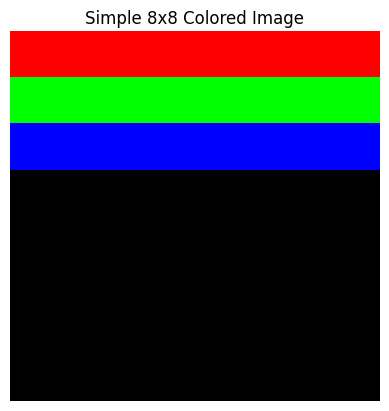

Example of the array structure for the Red channel:
[[255   0   0]
 [255   0   0]
 [255   0   0]
 [255   0   0]
 [255   0   0]
 [255   0   0]
 [255   0   0]
 [255   0   0]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 8x8 colored image
# This will use an 8x8x3 array to represent a colored pattern

# Initialize the 8x8x3 array with zeros (black)
colored_image_data = np.zeros((8, 8, 3), dtype=int)

# Create a simple pattern: fill the first row with red, the second with green, and the third with blue
colored_image_data[0, :, 0] = 255  # Red channel
colored_image_data[1, :, 1] = 255  # Green channel
colored_image_data[2, :, 2] = 255  # Blue channel

# Display the colored image
plt.imshow(colored_image_data)
plt.title('Simple 8x8 Colored Image')
plt.axis('off') 
plt.show()

# Display the array structure for the red channel as an example
print("Example of the array structure for the Red channel:")
print(colored_image_data[0, :, :])

In [5]:
print("The whole image:")
colored_image_data

The whole image:


array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0

In [8]:
# Generate a simple random noise vector
noise_vector_size = 100  # Size of the noise vector
random_noise_vector = np.random.normal(0, 1, noise_vector_size)  # Sample from a normal distribution

# Just for demonstration
print("This is what a Random Noise Vector looks like: \n", random_noise_vector[:5], "...")  # Show just the first 5 elements for brevity

This is what a Random Noise Vector looks like: 
 [-0.76687897  1.5144554   0.67207234  0.62941111 -3.03852285] ...


#### Here is a simple example of how a random set of 4 numbers can be transformed into a 2x2 pixel image. Look at all the weights we need to make something this simple!

In [15]:
# Example: Pretend we're starting with a simple 1D noise vector of size 4
noise_vector = np.array([0.5, -0.1, 0.3, 0.7])

# Pretend weights for a dense layer that will transform the 1D noise vector into a format
# that can be reshaped into a 3D array (e.g., for a very small 2x2 image with 3 color channels, we need 2*2*3 = 12 values)
weights = np.array([
    [0.2, -0.5, 0.1, 0.4, -0.3, 0.7, -0.6, 0.2, 0.1, -0.2, 0.4, 0.5],
    [-0.1, 0.3, -0.4, 0.5, 0.2, -0.7, 0.6, -0.1, 0.4, 0.3, -0.5, -0.2],
    [0.4, -0.2, 0.6, -0.3, 0.7, -0.1, 0.5, -0.4, 0.2, 0.5, -0.6, 0.3],
    [0.5, 0.1, -0.2, 0.6, -0.4, 0.3, -0.5, 0.7, -0.1, 0.2, -0.3, 0.4]
])

# Bias for the dense layer (one value for each of the 12 outputs)
bias = np.array([0.1, -0.1, 0.2, 0.1, -0.2, 0.1, 0.05, 0.05, -0.05, 0.1, -0.1, 0.2])

# Transformation using the dense layer (weights and bias)
# This operation transforms the noise vector into a "flattened" image representation
transformed_vector = np.dot(noise_vector, weights) + bias

# Reshape the transformed vector into a 3D array to simulate an image
# For the purpose of this example, we're pretending the target image is 2x2 pixels with 3 color channels
transformed_image = transformed_vector.reshape((2, 2, 3))

transformed_image

array([[[ 0.68, -0.37,  0.33],
        [ 0.58, -0.44,  0.7 ]],

       [[-0.51,  0.53, -0.05],
        [ 0.26, -0.24,  0.84]]])

This is a simplified example of what can happen in the convolution layers of the discriminator. 
It filters parts of the image out and finds relevant features:


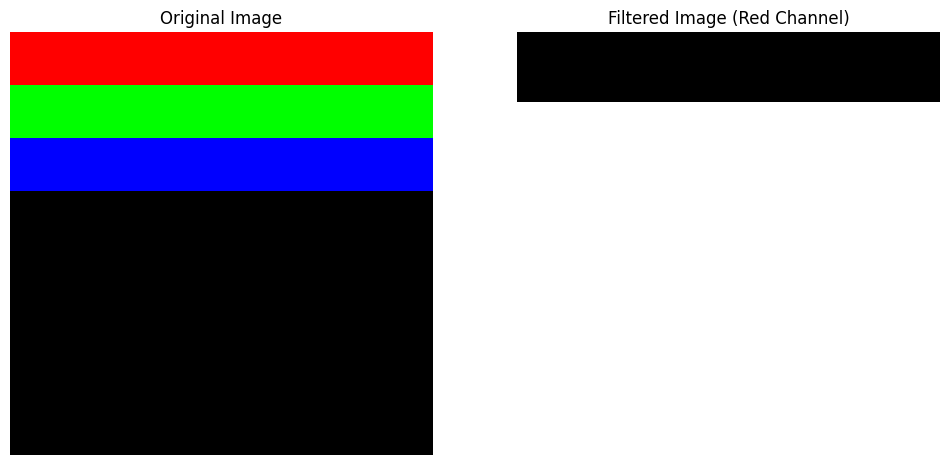

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Simple 8x8x3 colored image
colored_image_data = np.zeros((8, 8, 3), dtype=int)
colored_image_data[0, :, 0] = 255  # Red channel in the first row
colored_image_data[1, :, 1] = 255  # Green channel in the second row
colored_image_data[2, :, 2] = 255  # Blue channel in the third row

# Simple edge-detection filter (3x3 matrix)
edge_filter = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

# Applying the filter manually to a single channel for simplicity
# Note: In practice, convolutional operations are done using deep learning libraries that handle these efficiently
def apply_filter(image, filter):
    # Assuming the image and filter are square for simplicity
    image_height, image_width = image.shape
    filter_size = filter.shape[0]
    output_size = image_height - filter_size + 1
    output = np.zeros((output_size, output_size))
    
    # Convolution operation
    for i in range(output_size):
        for j in range(output_size):
            # Extract the current region of interest
            region = image[i:i+filter_size, j:j+filter_size]
            # Apply the filter (element-wise multiplication and sum)
            output[i, j] = np.sum(region * filter)
    
    return output

# Apply the filter to the red channel of our image
filtered_image = apply_filter(colored_image_data[:, :, 0], edge_filter)

print("This is a simplified example of what can happen in the convolution layers of the discriminator. \nIt filters parts of the image out and finds relevant features:")
# Visualize the original and filtered image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(colored_image_data)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Red Channel)')
plt.axis('off')

plt.show()

#### This is pseudo-code to show how a GAN model works. The generator and discriminators get initialized, and then we set up functions to move through them. Once we have that set up, we can set up loss functions that calculate how different the real images are from the generated images. Once we have the loss calculated (called the loss gradient), we can use that to update the weights that we use to transform the random noise vector in the generator.

In [ ]:
import some_deep_learning_library as dl

# Pseudo-code for a simple GAN

class Generator():
    def __init__(self, noise_dim):
        # Initialize layers using a deep learning library
        self.dense = dl.DenseLayer(noise_dim, some_output_dim)
        self.conv1 = dl.ConvTransposeLayer(filters=64, kernel_size=(5, 5))
        # ... more layers as needed, possibly with BatchNorm and ReLU
        self.output = dl.ConvTransposeLayer(filters=3, kernel_size=(5, 5), activation='tanh')

    def forward(self, z):
        # Pass the noise through the network to generate an image
        x = self.dense(z)
        x = self.conv1(x)
        # ... more layers as needed
        image = self.output(x)
        return image


class Discriminator():
    def __init__(self, image_shape):
        # Initialize layers using a deep learning library
        self.conv1 = dl.ConvLayer(filters=64, kernel_size=(5, 5))
        # ... more layers as needed, possibly with LeakyReLU
        self.output = dl.DenseLayer(some_input_dim, 1, activation='sigmoid')

    def forward(self, image):
        # Pass the image through the network to classify as real or fake
        x = self.conv1(image)
        # ... more layers as needed
        real_or_fake = self.output(x)
        return real_or_fake


# Initialize the generator and discriminator
generator = Generator(noise_dim=100)
discriminator = Discriminator(image_shape=(64, 64, 3))

# Pseudo code for the training loop
for epoch in range(num_epochs):
    for real_images in data_loader:

        # Generate fake images
        noise = dl.random_noise(batch_size, noise_dim)
        fake_images = generator.forward(noise)

        # Train the discriminator
        # Maximize log(D(x)) + log(1 - D(G(z)))
        discriminator_loss = dl.compute_loss(real_images, fake_images)

        # Update discriminator parameters
        discriminator.update_params(discriminator_loss)

        # Train the generator
        # Minimize log(1 - D(G(z))) or equivalently maximize log(D(G(z)))
        noise = dl.random_noise(batch_size, noise_dim)
        fake_images = generator.forward(noise)
        generator_loss = dl.compute_loss(discriminator.forward(fake_images))

        # Update generator parameters
        generator.update_params(generator_loss)

        # Log progress, save models, generate sample images, etc.